# TIM - TP3 : Filtrage

Pour cette séance, on continue à voir des algorithmes de prétraitement. Aujourd'hui, nous allons donc développer plusieurs algorithmes classiques de filtrage.

Mais d'abord, on ne change pas les bonnes habitudes : on importe les librairies nécessaires pour ce TP et on définit le chemin de notre base d'images.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
from scipy.ndimage.interpolation import shift
import pandas as pd

path_base = '..//Base_images//'

Puis, chargez l'image noir et blanc que vous souhaitez pour ce TP. 

/!\ : Il nous faut une image en noir et blanc, donc avec uniquement un seul channel (matrice 2D)

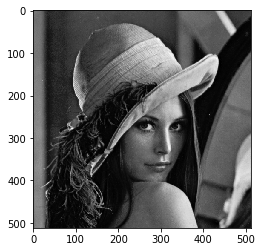

In [2]:
# A compléter
# Chargement de l'image de votre choix (N&B)
image = cv2.imread(path_base+'lena_gray.tif',0)
plt.imshow(image,'gray')

## Ex. 1 : Le bruitage des images

Et oui ! Avant de filtrer une image, nous allons d'abord passer en revue quelques types de bruits et implémenter des fonctions pour appliquer un bruit artificiel sur notre image.

**1.**

Commencez par implémenter une fonction permettant de générer p pourcents de bruit uniforme blanc et noir (salt & pepper) sur une image.

*_Un petit rappel : mieux vaut éviter les boucles ;)_*

In [3]:
# A compléter
# Développement de la fonction de génération de bruit Salt and Pepper
def salt_and_pepper_noise(img,p):
    # Création masque aléatoire avec p% de 0 et (100-p)% de 1
    mask=(np.random.randint(100,size=img.shape)>p)
    # Image bruit avec aléatoirement du blanc et du noir
    new_img = np.random.randint(2,size=img.shape)*255
    # Tous les pixels de mask à 0, prennent la valeur de new_img (0 ou 255) dans l'image originale
    new_img[mask]=img[mask]
    return new_img.astype(np.uint8)

Appliquez un bruit S&P de 3% sur l'image que vous avez voulu traiter aujourd'hui, et affichez là.

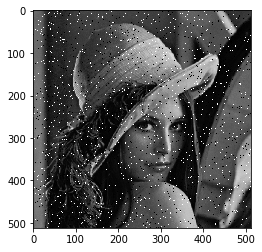

In [4]:
# A compléter
# Bruitage de l'image avec un bruit salt & pepper
image_s_p = salt_and_pepper_noise(image,3)
# Affichage de l'image bruitée
plt.imshow(image_s_p,'gray')

**2.**

Implémentez maintenant une fonction permettant de générer un bruit gaussien de moyenne *mean* et d'écart-type *std* sur une image.

In [5]:
# A compléter
# Développement de la fonction de génération de bruit gaussien
def gaussian_noise(img,mean,std):
    # Création de la matrice de bruit gaussien, puis ajout sur l'image originale.
    # Enfin, on s'assure que les valeurs de notre nouvelle image se situent entre 0 et 255 et on convertit en entier.
    return np.clip(img + np.random.normal(mean, std, img.shape),0,255).astype(np.uint8)

Appliquez un bruit gaussien de moyenne 0 et d'écart-type 5 sur l'image que vous avez voulu traiter aujourd'hui, et affichez là.

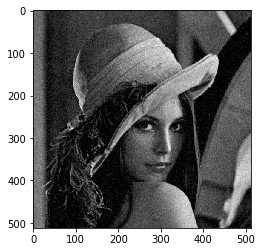

In [6]:
# A compléter
# Bruitage de l'image avec un bruit gaussien
image_gauss = gaussian_noise(image,-5,10)
# Affichage de l'image bruitée
plt.imshow(image_gauss,'gray')

## Ex. 2 : Passons aux filtrages maintenant !

Maintenant que nous avons des images bruitées, nous allons les filtrer maintenant ;) Nous allons donc développer plusieurs algorithmes de filtrage vus en cours :D

**1.**

Implémentez une fonction de filtrage moyenneur de taille *nxn* avec *n* impair.

In [7]:
# A compléter
# Développement de la fonction de filtrage moyenneur
def mean_filter(img,n):
    h,w = img.shape
    new_img = np.empty((h,w),dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            fenetre = img[max(i-n//2,0):min(1+i+n//2,h),max(0,j-n//2):min(1+j+n//2,w)]
            new_img[i,j] = np.mean(fenetre)
    return new_img

def mean_filter_fast(img,n):
    return np.floor(sum([shift(img.astype(np.float32),(i-n//2,j-n//2),cval=np.NaN) for i,j in itertools.product(range(n),range(n))])/(n*n)).astype(np.uint8)

Affichez le résultat de l'application du filtre moyenneur sur l'image bruitée S&P.

*_Note :_* Histoire de me simplifier la vie, j'ai créer un fichier utils.py avec les fonctions chronométrer et afficher du TP2.

Temps d'exécution de Filtrage moyenneur taille n=3 : 4.36 sec
Temps d'exécution de Filtrage moyenneur taille n=3 : 0.26 sec


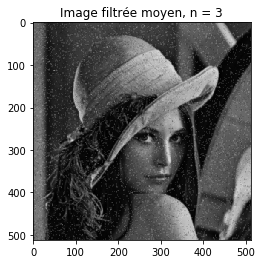

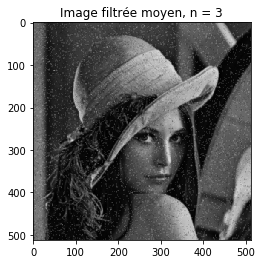

In [8]:
# A compléter
# Import des fonction de chronométrage et d'affichage de utils.py
from utils import chronometrer, afficher

# Chronométrage du filtrage moyenneur sur l'image bruité S&P
n=3
mean_image_s_p = chronometrer(mean_filter,"Filtrage moyenneur taille n={}".format(n),image_s_p,n)
mean_image_s_p_fast = chronometrer(mean_filter_fast,"Filtrage moyenneur taille n={}".format(n),image_s_p,n)

# Affichage de l'image sortante
afficher(mean_image_s_p,'gray',"Image filtrée moyen, n = {}".format(n))
afficher(mean_image_s_p_fast,'gray',"Image filtrée moyen, n = {}".format(n))

**2.**

Implémentez maintenant une fonction de filtrage médian de taille *_nxn_* avec *n* impair.

In [9]:
# A compléter
# Développement de la fonction de filtrage médian
def median_filter(img,n):
    h,w = img.shape
    new_img = np.empty((h,w),dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            fenetre = img[max(i-n//2,0):min(1+i+n//2,h),max(0,j-n//2):min(1+j+n//2,w)]
            new_img[i,j] = np.median(fenetre)
    return new_img

def median_filter_faster(img,n):
    return np.floor(np.nanmedian(np.stack([shift(img,(i-n//2,j-n//2),cval=np.NaN) for i,j in itertools.product(range(n),range(n))],axis=-1),axis=(-1))).astype(np.uint8)

Vous connaissez déjà la chanson : Affichez le résultat de l'application du filtre médian sur l'image bruitée S&P.

Temps d'exécution de Filtrage médian taille n=3 : 9.99 sec
Temps d'exécution de Filtrage médian taille n=3 : 0.39 sec


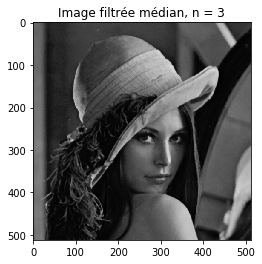

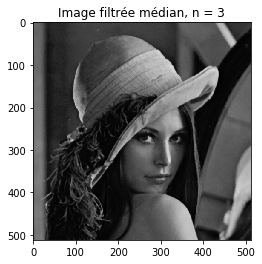

In [10]:
# A compléter
# Chronométrage du filtrage moyenneur sur l'image bruité S&P
n=3
med_image_s_p = chronometrer(median_filter,"Filtrage médian taille n={}".format(n),image_s_p,n)
med_image_s_p_fast = chronometrer(median_filter_faster,"Filtrage médian taille n={}".format(n),image_s_p,n)

# Affichage de l'image sortante
afficher(med_image_s_p,'gray',"Image filtrée médian, n = {}".format(n))
afficher(med_image_s_p_fast,'gray',"Image filtrée médian, n = {}".format(n))

**3.**

Passons maintenant au filtrage gaussien ! Là, on va également faire une fonction et chronométrer/afficher le résultat, mais passons d'abord par une explication plus théorique.

Pour ce type de filtre, nous allons appliquer une convolution à partir d'un masque de convolution *_h_*. Pour une image *_A_*, avec le masque *_h_*, le résultat sortant est : 
\begin{equation*}
    C[i,j] = \sum_{k \in W} \sum_{l \in W} h[k,l]A[i-k,j-l]
\end{equation*}
Un pixel *_A[i,j]_* est remplacé par une somme pondérée de lui-même et des pixels de son voisinage *_W_*.

Dans le cas précédent du filtre moyenneur, cela équivaut à faire une convolution avec *_h_* de taille $n \times n$:
\begin{equation*}
    h = 
    \begin{vmatrix}
        1/n & \cdots & 1/n \\
        \vdots & \ddots & \vdots \\
        1/n & \cdots & 1/n
    \end{vmatrix}
\end{equation*}

En ce qui concerne le filtre gaussien, le masque de convolution prendra la forme qui suit :


\begin{equation*}
    h(x,y) = \frac{1}{2 \pi \sigma^{2}} exp(-\frac{(x^{2}+y^{2})}{2 \sigma^{2}})
\end{equation*}

Maintenant, concernant le filtre gaussien, nous allons définir les masques nous-même, qui sont un arrondi de la formule. Par exemple, le masque suivant que vous allez créer est une approximation avec $\sigma = 0.8$ pour un masque de taille $3x3$.
\begin{equation*}
    h = \frac{1}{16} 
        \begin{vmatrix}
        1 & 2 & 1 \\
        2 & 4 & 2 \\
        1 & 2 & 1
        \end{vmatrix}
\end{equation*}

In [11]:
# A compléter
# Création du masque de convolution pour un filtrage gaussien
gauss_h = np.array([[1,2,1],[2,4,2],[1,2,1]],dtype=np.float64)/16

Développez la fonction de convolution avec le masque h pour effectuer un filtrage gaussien.

In [12]:
# A compléter
# Implémentation de la fonction de convolution
def convolution(img,h):
    h_rows,h_cols=h.shape
    rows,cols = img.shape
    large_img = np.zeros((rows+h_rows-1,cols+h_cols-1),dtype=np.uint8)
    large_img[h_rows//2:h_rows//2+rows,h_cols//2:h_cols//2+cols]=img
    out_img = np.zeros((rows,cols),dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            out_img[i,j]=np.sum(large_img[i:i+h_rows,j:j+h_cols]*h)
    return out_img

def convolution_faster(img,h):
    h_rows,h_cols=h.shape
    h = h.reshape((-1,))
    rows,cols = img.shape
    large_img = np.stack([shift(img.astype(np.float32),(i-h_rows//2,j-h_cols//2),cval=np.NaN) for i,j in itertools.product(range(h_rows),range(h_cols))],axis=-1)
    return np.dot(large_img,h).astype(np.uint8)

Affichez le résultat de l'application de la convolution avec le kernel gaussien sur l'image bruitée gaussien.

Temps d'exécution de Filtrage gaussien  : 2.92 sec
Temps d'exécution de Filtrage gaussien  : 0.27 sec


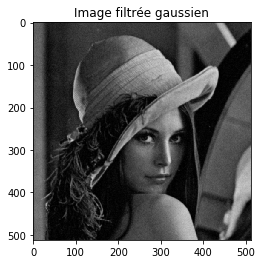

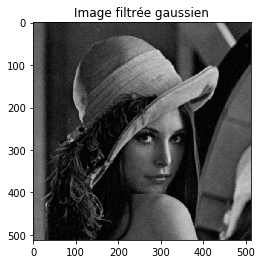

In [13]:
# A compléter
# Chronométrage du filtrage moyenneur sur l'image bruité gaussien
gauss_image_gauss = chronometrer(convolution,"Filtrage gaussien ",image_gauss,gauss_h)
gauss_image_gauss_fast = chronometrer(convolution_faster,"Filtrage gaussien ",image_gauss,gauss_h)

# Affichage de l'image sortante
afficher(gauss_image_gauss,'gray',"Image filtrée gaussien")
afficher(gauss_image_gauss_fast,'gray',"Image filtrée gaussien")

**4.**

Allez, plus qu'un dernier filtre à développer ! Et ça va être très rapide ;)

En effet, place au filtre exponentiel. Même principe que tout à l'heure : une convolution avec un masque de ce type :
\begin{equation*}
    h(x,y) = \frac{\gamma^{2}}{4}exp(-\gamma(|x|+|y|))
\end{equation*}

Pour ce dernier filtre, créez le masque suivant :
\begin{equation*}
    h = \frac{1}{80} 
        \begin{vmatrix}
        1 & 1 & 3 & 1 & 1 \\
        1 & 3 & 7 & 3 & 1 \\
        3 & 7 & 16 & 7 & 3 \\
        1 & 3 & 7 & 3 & 1 \\
        1 & 1 & 3 & 1 & 1 \\
        \end{vmatrix}
\end{equation*}

In [14]:
# A compléter
# Création du masque de convolution pour le filtrage exponentiel
expo_h = np.array([[1,1,3,1,1],
                  [1,3,7,3,1],
                  [3,7,16,7,3],
                  [1,3,7,3,1],
                  [1,1,3,1,1]],dtype=np.float64)/80

Affichez le résultat de l'application de la convolution avec le kernel exponentiel sur l'image bruitée gaussien.

Temps d'exécution de Filtrage exponentiel  : 2.92 sec
Temps d'exécution de Filtrage exponentiel  : 0.79 sec


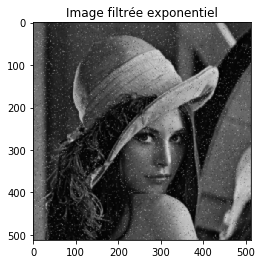

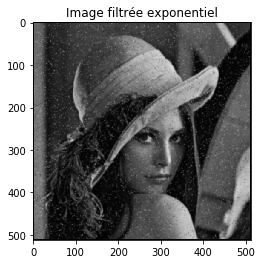

In [15]:
# A compléter
# Chronométrage du filtrage moyenneur sur l'image bruité gaussien
expo_image_gauss = chronometrer(convolution,"Filtrage exponentiel ",image_s_p,expo_h)
expo_image_gauss_fast = chronometrer(convolution_faster,"Filtrage exponentiel ",image_s_p,expo_h)

# Affichage de l'image sortante
afficher(expo_image_gauss,'gray',"Image filtrée exponentiel")
afficher(expo_image_gauss_fast,'gray',"Image filtrée exponentiel")

## Ex. 3 : Et si on analysait les effets obtenus après filtrage ?

Pour l'instant, nous avons créé 2 images bruitées et créez 3 fonctions de filtrages (moyenne, médiane et convolution pour filtrage gaussien et exponentiel). Cependant, il est important d'analyser les résultats obtenus, et ne pas appliquer les filtres bêtement sur les images sans réflexion derrière...

Pour cela, créez, à partir de votre image originale, 2 listes d'images bruitées : une avec des images bruitées P&S avec poucentage variable, et une avec des images bruitées gaussien avec moyenne *mean* et écart-type *std* variables.

Pour rappel, une liste se construit avec des crochets : 
\begin{equation*}
    liste = [element1,element2,...,elementZ]
\end{equation*}

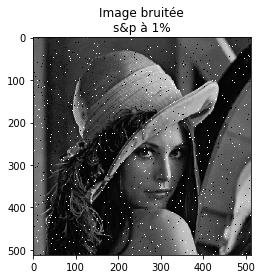

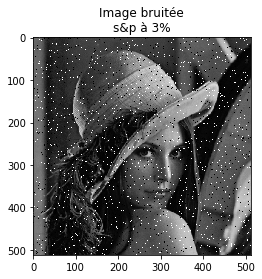

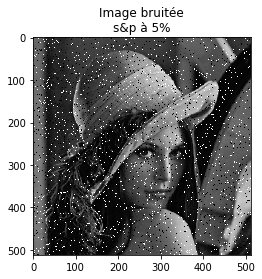

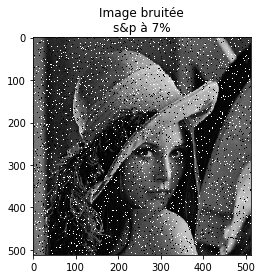

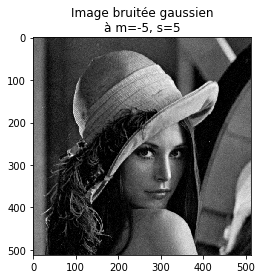

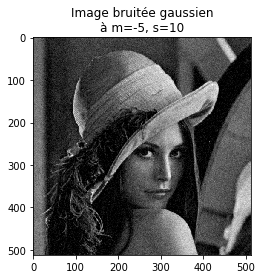

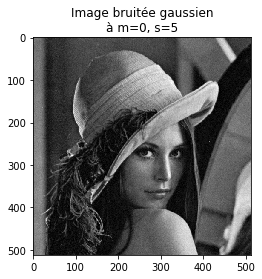

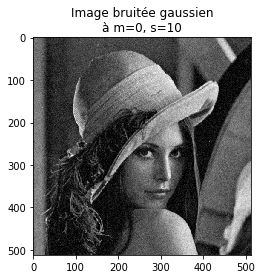

In [16]:
# A compléter
# Création des listes d'images bruitées
s_and_p_noisy_images = [salt_and_pepper_noise(image,p) for p in [1,3,5,7]]
gauss_noisy_images = [gaussian_noise(image,m,s) for m,s in itertools.product([-5,5],[5,10])]

# Affichage des images bruitées S&P
for subplot,img,title in zip(range(len(s_and_p_noisy_images)),s_and_p_noisy_images,["Image bruitée\ns&p à {}%".format(p) for p in [1,3,5,7]]):
    plt.imshow(img,'gray')
    plt.title(title)
    plt.show()

# Affichage des images bruitées Gaussien
for subplot,img,title in zip(range(len(gauss_noisy_images)),gauss_noisy_images,["Image bruitée gaussien\nà m={}, s={}".format(m,s) for m,s in itertools.product([-5,0,5],[5,10])]):
    plt.imshow(img,'gray')
    plt.title(title)
    plt.show()

Développez une fonction pour calculer l'erreur totale entre 2 images A et B, à savoir ici la moyenne des valeurs absolues des différences des N pixels :
\begin{equation*}
    erreur = \frac{\sum_{i,j} |A[i,j]-B[i,j]|}{N}
\end{equation*}

In [17]:
# A compléter
# Fonction de calcul de l'erreur totale L1
def error_tae(A,B):
    C = (A.astype(np.int16)-B.astype(np.int16)).astype(np.int32)
    return np.mean(np.abs(C))

# Fonction de calcul de l'erreur L2
def error_mse(A,B):
    C = (A.astype(np.int16)-B.astype(np.int16)).astype(np.int32)
    return np.mean(np.power(C,2))

Ok, maintenant, nous avons nos images bruitées, nos fonctions de filtrages, et notre fonction de calcul d'erreur.
Il est l'heure d'analyser les effets des filtrages sur les images bruitées (d'un point de vue matriciel, mais également d'un point de vue visuel et également d'un point de vue chronométrique). Choisissez l'un des 4 filtres (Moyen, Médian, Gaussien, Exponentiel) et faites des expérimentations, pour expliquer les effets de ce filtres (avantages et inconvénients).

*_Note :_* Pour tous ceux qui veulent analyser un filtre avec convolution, je vous conseille fortement d'abandonner votre fonction de convolution et d'utiliser la fonction filter2D d'OpenCV, qui prend en paramètre votre image et votre masque. Pour plus d'informations : https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d

Temps d'exécution de Filtrage médian,n=3,Image bruitée s&p à 1% : 0.38 sec
Temps d'exécution de Filtrage médian,n=3,Image bruitée s&p à 3% : 0.38 sec
Temps d'exécution de Filtrage médian,n=3,Image bruitée s&p à 5% : 0.38 sec
Temps d'exécution de Filtrage médian,n=3,Image bruitée s&p à 7% : 0.38 sec
Temps d'exécution de Filtrage médian,n=5,Image bruitée s&p à 1% : 1.02 sec
Temps d'exécution de Filtrage médian,n=5,Image bruitée s&p à 3% : 1.02 sec
Temps d'exécution de Filtrage médian,n=5,Image bruitée s&p à 5% : 1.01 sec
Temps d'exécution de Filtrage médian,n=5,Image bruitée s&p à 7% : 1.02 sec
Temps d'exécution de Filtrage médian,n=7,Image bruitée s&p à 1% : 2.05 sec
Temps d'exécution de Filtrage médian,n=7,Image bruitée s&p à 3% : 2.06 sec
Temps d'exécution de Filtrage médian,n=7,Image bruitée s&p à 5% : 2.06 sec
Temps d'exécution de Filtrage médian,n=7,Image bruitée s&p à 7% : 2.05 sec


<Figure size 432x288 with 0 Axes>

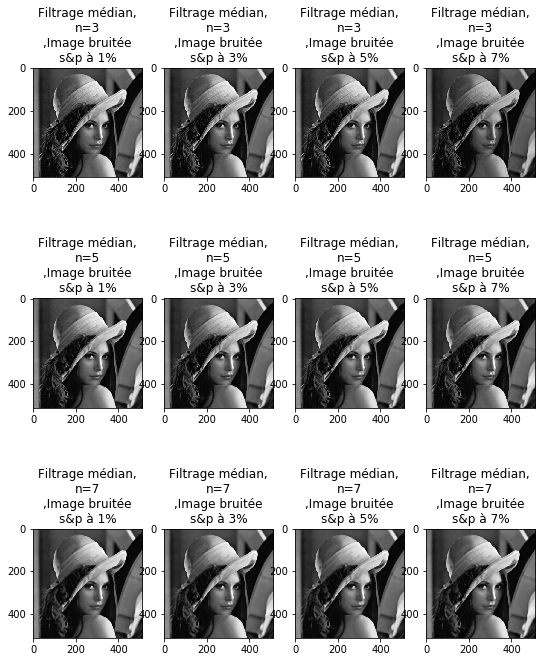

In [18]:
# Analyse des images bruitées S&P
list_n = [3,5,7]
list_i = list(range(len(s_and_p_noisy_images)))
index_dataframe = ["Fenêtre d'analyse de taille {}x{}".format(n,n) for n in list_n]
columns_dataframe = ["Bruit S&P {}%".format(i) for i in [1,3,5,7]]

L1_errors = pd.DataFrame(np.empty((len(list_n),len(list_i)),dtype=np.float32),
                        index=index_dataframe, columns=columns_dataframe)
L2_errors = pd.DataFrame(np.empty((len(list_n),len(list_i)),dtype=np.float32),
                        index=index_dataframe, columns=columns_dataframe)

plt.figure()
plt.subplots(len(list_n),len(list_i),figsize=(3*len(list_n),3*len(list_i)))
j=1
for n in list_n:
    for img,i in zip(s_and_p_noisy_images,list_i) :
        plt.subplot(len(list_n),len(list_i),j)
        j+=1
        titre="Filtrage médian,n={},Image bruitée s&p à {}%".format(n,2*i+1)
        titrefig="Filtrage médian,\nn={}\n,Image bruitée\ns&p à {}%".format(n,2*i+1)
        img_filtree = chronometrer(median_filter_faster,titre,img,n)
        L1_errors["Bruit S&P {}%".format(2*i+1)]["Fenêtre d'analyse de taille {}x{}".format(n,n)] = error_tae(image,img_filtree)
        L2_errors["Bruit S&P {}%".format(2*i+1)]["Fenêtre d'analyse de taille {}x{}".format(n,n)] = error_mse(image,img_filtree)
        plt.imshow(img_filtree,'gray')
        plt.title(titrefig)
plt.show()

In [19]:
print("Affichage des erreurs L1")
L1_errors

Affichage des erreurs L1


,Bruit S&P 1%,Bruit S&P 3%,Bruit S&P 5%,Bruit S&P 7%
Fenêtre d'analyse de taille 3x3,2.091148,2.162861,2.245369,2.333527
Fenêtre d'analyse de taille 5x5,3.330994,3.373314,3.431461,3.483189
Fenêtre d'analyse de taille 7x7,4.197166,4.233288,4.274288,4.310001


In [20]:
print("Affichage des erreurs L2")
L2_errors

Affichage des erreurs L2


,Bruit S&P 1%,Bruit S&P 3%,Bruit S&P 5%,Bruit S&P 7%
Fenêtre d'analyse de taille 3x3,14.871910,16.316753,17.921982,20.390442
Fenêtre d'analyse de taille 5x5,37.399643,38.061188,39.551899,40.921986
Fenêtre d'analyse de taille 7x7,62.967957,63.605846,64.909912,66.366806


Temps d'exécution de Filtrage médian,n=3,Image bruitée gaussien, moy=-5, std=5 : 0.38 sec
Temps d'exécution de Filtrage médian,n=3,Image bruitée gaussien, moy=-5, std=10 : 0.38 sec
Temps d'exécution de Filtrage médian,n=3,Image bruitée gaussien, moy=5, std=5 : 0.38 sec
Temps d'exécution de Filtrage médian,n=3,Image bruitée gaussien, moy=5, std=10 : 0.37 sec
Temps d'exécution de Filtrage médian,n=5,Image bruitée gaussien, moy=-5, std=5 : 1.03 sec
Temps d'exécution de Filtrage médian,n=5,Image bruitée gaussien, moy=-5, std=10 : 1.03 sec
Temps d'exécution de Filtrage médian,n=5,Image bruitée gaussien, moy=5, std=5 : 1.03 sec
Temps d'exécution de Filtrage médian,n=5,Image bruitée gaussien, moy=5, std=10 : 1.02 sec
Temps d'exécution de Filtrage médian,n=7,Image bruitée gaussien, moy=-5, std=5 : 2.07 sec
Temps d'exécution de Filtrage médian,n=7,Image bruitée gaussien, moy=-5, std=10 : 2.09 sec
Temps d'exécution de Filtrage médian,n=7,Image bruitée gaussien, moy=5, std=5 : 2.09 sec
Temps d'ex

<Figure size 432x288 with 0 Axes>

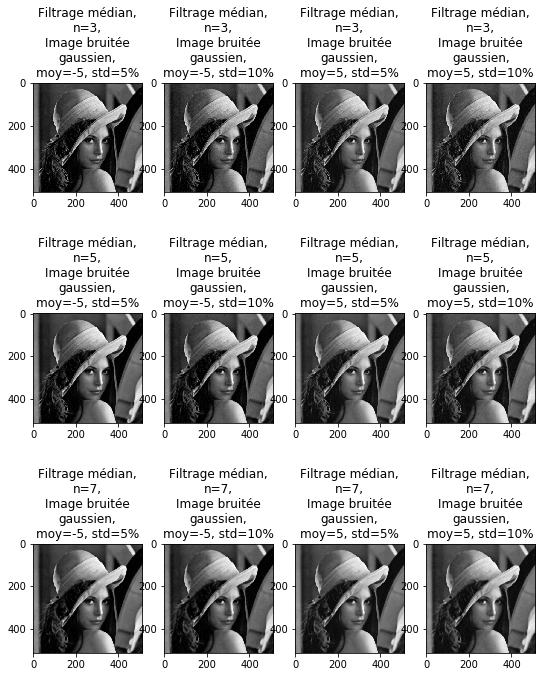

In [21]:
# Analyse des images bruitées gaussiennes
list_n = [3,5,7]
list_i = [(m,s) for m,s in itertools.product([-5,5],[5,10])]
index_dataframe = ["Fenêtre d'analyse de taille {}x{}".format(n,n) for n in list_n]
columns_dataframe = ["Bruit Gaussien moy={}, std={}".format(m,s) for m,s in itertools.product([-5,5],[5,10])]

L1_errors = pd.DataFrame(np.empty((len(list_n),len(list_i)),dtype=np.float32),
                        index=index_dataframe, columns=columns_dataframe)
L2_errors = pd.DataFrame(np.empty((len(list_n),len(list_i)),dtype=np.float32),
                        index=index_dataframe, columns=columns_dataframe)

plt.figure()
plt.subplots(len(list_n),len(list_i),figsize=(3*len(list_n),3*len(list_i)))
j=1
for n in list_n:
    for img,i in zip(gauss_noisy_images,list_i) :
        plt.subplot(len(list_n),len(list_i),j)
        j+=1
        titre="Filtrage médian,n={},Image bruitée gaussien, moy={}, std={}".format(n,i[0],i[1])
        titrefig="Filtrage médian,\nn={},\nImage bruitée\ngaussien,\nmoy={}, std={}%".format(n,i[0],i[1])
        img_filtree = chronometrer(median_filter_faster,titre,img,n)
        L1_errors["Bruit Gaussien moy={}, std={}".format(i[0],i[1])]["Fenêtre d'analyse de taille {}x{}".format(n,n)] = error_tae(image,img_filtree)
        L2_errors["Bruit Gaussien moy={}, std={}".format(i[0],i[1])]["Fenêtre d'analyse de taille {}x{}".format(n,n)] = error_mse(image,img_filtree)
        plt.imshow(img_filtree,'gray')
        plt.title(titrefig)

In [22]:
print("Affichage des erreurs L1")
L1_errors

Affichage des erreurs L1


,"Bruit Gaussien moy=-5, std=5","Bruit Gaussien moy=-5, std=10","Bruit Gaussien moy=5, std=5","Bruit Gaussien moy=5, std=10"
Fenêtre d'analyse de taille 3x3,5.942780,6.406902,5.133064,5.881168
Fenêtre d'analyse de taille 5x5,6.568672,6.781658,5.749416,6.120327
Fenêtre d'analyse de taille 7x7,7.171696,7.347855,6.354855,6.650246


In [23]:
print("Affichage des erreurs L2")
L2_errors

Affichage des erreurs L2


,"Bruit Gaussien moy=-5, std=5","Bruit Gaussien moy=-5, std=10","Bruit Gaussien moy=5, std=5","Bruit Gaussien moy=5, std=10"
Fenêtre d'analyse de taille 3x3,50.881805,63.643574,38.689857,53.834713
Fenêtre d'analyse de taille 5x5,73.604851,80.413940,56.321796,64.300842
Fenêtre d'analyse de taille 7x7,101.022675,105.961922,78.993744,85.378525


**_Filtre choisi :_** Filtre médian

**_Analyse du filtre choisi :_** 
- Le point visuel : Le filtrage médian fonctionne très bien pour éliminer le bruit S&P. Cela est dû à son efficacité à éliminer les valeurs extremes (ici 0 et 255) qui apparaissent subitement sur l'image. Concernant le bruit gaussien, le filtrage médiant reste moins performant : on voit encore les effets du bruitage.

- Le point matriciel : Plus le bruit est important, plus les erreurs L1 et L2 sont grandes, tout est logique ici. Maintenant, on voit que plus notre fenêtre d'analyse de taille nXn est grande, plus l'erreur est grande. En effet, notre image analysée varie énormement, ce qui signifie qu'utiliser une grande fenêtre d'analyse induira plus d'erreur car les pixels de la fenêtre d'extraction varieront beaucoup localement. Pour cela, il vaut mieux utiliser une petite fenêtre.

- Le point temps d'exécution : Plus la fenêtre est grande, plus le temps d'exécution augmente. De plus, en remettant dans le contexte, notre image est uniquement de taille 512x512, ce qui est plutôt petit. Notre algorithme de filtrage médian est assez lent, comparé aux filtrages via convolution (le tri de tableau est long à réaliser, même optimisé). Pour cette raison, ce filtre est peu utilisé lorsqu'on veut avoir un bon ratio résultat/temps de calcul. 

## Rendu de TP
Le rendu qui vous est demandé pour les TP de TIM est la version HTML de ce notebook. Pour l'obtenir: Fichier, télécharger au format, HTML (.html). Avant d'exporter en HTML, veuillez relancer tout votre notebook : Kernel, Redémarrer le kernel et exécuter toutes les cellules